<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: World Development Statistics

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Smoking is a very prevalent problem in various countries and regions across the world. Smoking can be the source of serious health problems and can ultimately lead to death in many cases. With products such as cigarettes and e-cigarettes becoming more and more popular as time goes on, there is a high chance that there will be an increase in the amount of deaths throughout various countries. The objective of this project is to find whether countries with a low life expectancy also have a high rate of smoking in the year 2020.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

As smoking has been a prevalent problem for many years, this project aims to dive into whether the past life expectancy and tabacco usage are related.

### Datasets Used:
* [`population.csv`](./data/population.csv): Population by Country
* [`life_expectancy.csv`](./data/life_expectancy.csv): Life Expectancy by Country
* [`share-of-adults-who-smoke.csv`](./data/share-of-adults-who-smoke.csv): Tabacco Usage by Country

### Outside Research

In order to conduct this research, data related to the tabacco use in each country was needed. The website: https://www.visualcapitalist.com/cp/visualizing-country-smoking-population/ provided a dataset which showcased the prevalence of tabacco use in various countries throughout the past few years.

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:
def find_mean(values):
    average = sum(values) / len(values)
    return average

find_mean([6, 3, 7, 14])

7.5

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Code:
def standard_dev(values):
    variance = sum((val - find_mean(values))**2 for val in values) / len(values)
    std = variance**0.5
    return std

standard_dev([6, 3, 7, 14])

4.031128874149275

3. Data cleaning function:
    
    Write a function that takes in a string consisting a number and an abbreviated place value (ex. '5M', '45K'), and converts that string to an integer. For example, inputting '5M' in your function should return 5000000, '45K' should return 45000, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
# Code:
def convert(amount):
    letters = {'B': 1000000000, 'K': 1000, 'M': 1000000}
    if amount:
        abbr = amount[-1].upper()  
    if abbr in letters:
        number = float(amount[0:-1])
        return int(number * letters[abbr])
    else:
        return float(amount)
    
convert('45K')

45000

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind reasonable values for each column).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of abbreviated numbers (ex. '3M', '45K', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to integers! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [5]:
# Code: 
#importing the datasets
population_df = pd.read_csv('../data/population.csv')
life_expectancy_df = pd.read_csv('../data/life_expectancy.csv')
smoking_df = pd.read_csv('../data/share-of-adults-who-smoke.csv')

In [6]:
#population dataframe with lowercase column names
population_df.columns = population_df.columns.str.lower()
population_df.dropna(inplace=True)
population_df.head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,108M,108M,109M,109M,109M,110M,110M,110M,111M,111M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,125M,126M,127M,128M,129M,130M,131M,131M,132M,133M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.35M,1.32M,1.29M,1.26M,1.23M,1.21M,1.18M,1.15M,1.12M,1.1M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62.5k,62.2k,61.9k,61.7k,61.4k,61.2k,60.9k,60.7k,60.5k,60.2k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,13.5M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14M,14.1M


In [7]:
#checking for missing values
population_df.isna().sum()

country    0
1800       0
1801       0
1802       0
1803       0
          ..
2096       0
2097       0
2098       0
2099       0
2100       0
Length: 302, dtype: int64

In [8]:
#display the datatypes for the population dataframe
population_df.dtypes

country    object
1800       object
1801       object
1802       object
1803       object
            ...  
2096       object
2097       object
2098       object
2099       object
2100       object
Length: 302, dtype: object

In [9]:
#using the convert method to fix abbreviated numbers
#inspiration for this line was used from https://www.tutorialspoint.com/how-to-select-all-columns-except-one-in-a-pandas-dataframe#:~:text=To%20select%20all%20columns%20except%20one%20column%20in%20Pandas%20DataFrame,%5D.
population_df.loc[:, population_df.columns != 'country'] = population_df.loc[:, population_df.columns != 'country'].applymap(convert)
population_df.head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,...,108000000.0,108000000.0,109000000.0,109000000.0,109000000.0,110000000.0,110000000.0,110000000.0,111000000.0,111000000.0
1,Angola,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,...,125000000.0,126000000.0,127000000.0,128000000.0,129000000.0,130000000.0,131000000.0,131000000.0,132000000.0,133000000.0
2,Albania,400000.0,402000.0,404000.0,405000.0,407000.0,409000.0,411000.0,413000.0,414000.0,...,1350000.0,1320000.0,1290000.0,1260000.0,1230000.0,1210000.0,1180000.0,1150000.0,1120000.0,1100000.0
3,Andorra,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,...,62500.0,62200.0,61900.0,61700.0,61400.0,61200.0,60900.0,60700.0,60500.0,60200.0
4,United Arab Emirates,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,...,13500000.0,13500000.0,13600000.0,13700000.0,13800000.0,13800000.0,13900000.0,14000000.0,14000000.0,14100000.0


In [10]:
#life expectancy dataframe without missing values and lowercase column names
life_expectancy_df.columns = life_expectancy_df.columns.str.lower()
life_expectancy_df.dropna(inplace=True)
life_expectancy_df.head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3
5,Argentina,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,...,86.2,86.3,86.5,86.5,86.7,86.8,86.9,87.0,87.1,87.2


In [11]:
life_expectancy_df.isna().sum()

country    0
1800       0
1801       0
1802       0
1803       0
          ..
2096       0
2097       0
2098       0
2099       0
2100       0
Length: 302, dtype: int64

In [12]:
#displaying the datatypes of life expectancy dataframe
life_expectancy_df.dtypes

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2096       float64
2097       float64
2098       float64
2099       float64
2100       float64
Length: 302, dtype: object

In [13]:
#smoking dataframe without missing smoking % values - even though missing values are in Code column, that has nothing to do with the data required
#changing column names to lowercase and fixing column names
smoking_df.columns = smoking_df.columns.str.lower()
smoking_df.rename(columns={'prevalence of current tobacco use (% of adults)': 'tabacco_use', 'entity': 'country'}, inplace=True)
smoking_df = smoking_df[smoking_df['year'] == 2020]
smoking_df.head(5)

,country,code,year,tabacco_use
6,Afghanistan,AFG,2020,23.3
13,Albania,ALB,2020,22.4
20,Algeria,DZA,2020,21.0
27,Andorra,AND,2020,31.8
34,Argentina,ARG,2020,24.5


In [14]:
smoking_df.isna().sum()

country         0
code           13
year            0
tabacco_use     0
dtype: int64

In [15]:
#datatypes for smoking dataframe
smoking_df.dtypes

country         object
code            object
year             int64
tabacco_use    float64
dtype: object

In [16]:
#inspiration on how to merge was used from https://pandas.pydata.org/docs/user_guide/merging.html
population_dataframe = pd.DataFrame(population_df)
life_expectancy_dataframe = pd.DataFrame(life_expectancy_df)
smoking_dataframe = pd.DataFrame(smoking_df)

merged_df = pd.merge(population_dataframe, life_expectancy_df, on='country', how='inner', suffixes=('_pop', '_life'))
merged_df = pd.merge(merged_df, smoking_dataframe, on='country', how='inner')
merged_df.head(5)

,country,1800_pop,1801_pop,1802_pop,1803_pop,1804_pop,1805_pop,1806_pop,1807_pop,1808_pop,...,2094_life,2095_life,2096_life,2097_life,2098_life,2099_life,2100_life,code,year,tabacco_use
0,Afghanistan,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,...,76.0,76.1,76.2,76.4,76.5,76.6,76.8,AFG,2020,23.3
1,Albania,400000.0,402000.0,404000.0,405000.0,407000.0,409000.0,411000.0,413000.0,414000.0,...,87.7,87.8,87.9,88.0,88.2,88.3,88.4,ALB,2020,22.4
2,Argentina,534000.0,520000.0,506000.0,492000.0,479000.0,466000.0,453000.0,441000.0,429000.0,...,86.5,86.7,86.8,86.9,87.0,87.1,87.2,ARG,2020,24.5
3,Armenia,413000.0,413000.0,413000.0,413000.0,413000.0,413000.0,413000.0,413000.0,413000.0,...,85.5,85.6,85.7,85.8,86.0,86.1,86.2,ARM,2020,25.5
4,Australia,200000.0,205000.0,211000.0,216000.0,222000.0,227000.0,233000.0,239000.0,246000.0,...,91.6,91.7,91.8,91.9,92.0,92.1,92.3,AUS,2020,13.6


In [17]:
#Save your cleaned and merged dataframes as csv files
output_csv_file = 'merged_data.csv'
merged_df.to_csv(output_csv_file)

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

|Feature|Type|Dataset|Description|
|---|---|---|---|
|country|object|population.csv|The name of the country being studied 
|code|object|share-of-adults-who-smoke.csv|Country code for specific country
|tabacco_use|float|share-of-adults-who-smoke.csv|The percent of adults who smoke in the respective country
|year|int|share-of-adults-who-smoke.csv|Year the data was taken from
|1800_pop|object|merged_data.csv|Population in the country in the given years
|1800_life|object|merged_data.csv|Life expectancy in the country in the given years


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in one of your dataframes.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value
        - *Example Output :* `{'1801': 3.80, '1802': 3.93, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest populations for the past few decades?
        - Which states have the highest and lowest economic growth over the course of the dataset?
        - What years were there new countries created?
        - Do any countries have higher growth rates of population than their economy?
        - Which countries have had the lowest population growth?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [18]:
#Code:
#1. Summary Statistics
summary_stats = merged_df.describe()
summary_stats

,1800_life,1801_life,1802_life,1803_life,1804_life,1805_life,1806_life,1807_life,1808_life,1809_life,...,2093_life,2094_life,2095_life,2096_life,2097_life,2098_life,2099_life,2100_life,year,tabacco_use
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.0,151.000000
mean,31.740397,31.690728,31.711258,31.594702,31.687417,31.841722,31.912583,31.856291,31.594040,31.505298,...,83.969536,84.085430,84.205960,84.323179,84.445695,84.560927,84.679470,84.798675,2020.0,19.644371
std,3.906630,3.899630,4.055655,4.090098,4.052280,4.133672,4.247106,4.097651,4.238415,4.187056,...,5.803103,5.791688,5.783335,5.778898,5.764879,5.759606,5.752754,5.749504,0.0,9.487842
min,23.400000,23.400000,23.400000,19.600000,23.400000,23.400000,23.400000,23.400000,12.500000,13.400000,...,67.000000,67.100000,67.200000,67.300000,67.400000,67.500000,67.600000,67.700000,2020.0,3.500000
25%,29.200000,29.150000,29.050000,29.050000,29.150000,29.200000,29.200000,29.200000,29.150000,28.950000,...,80.000000,80.150000,80.300000,80.400000,80.550000,80.650000,80.750000,80.900000,2020.0,11.450000
50%,32.000000,32.000000,32.000000,31.800000,31.900000,32.000000,32.000000,32.000000,31.900000,31.800000,...,84.500000,84.700000,84.800000,85.000000,85.100000,85.200000,85.300000,85.400000,2020.0,20.200000
75%,34.100000,34.300000,34.300000,34.000000,34.100000,34.100000,34.300000,34.250000,34.100000,34.000000,...,88.450000,88.550000,88.650000,88.750000,88.850000,88.950000,89.050000,89.150000,2020.0,25.450000
max,42.900000,40.300000,44.400000,44.800000,42.800000,44.300000,45.800000,43.600000,43.500000,41.700000,...,93.600000,93.700000,93.800000,94.000000,94.100000,94.200000,94.300000,94.400000,2020.0,44.100000


In [19]:
# 2.apply the standard deviation function to each numeric column
#read in my standard_dev function for each column
#use dictionary comprehension to loop through the merged df
#only apply to columns with numeric values
#inspiration for this line was used from https://stackoverflow.com/questions/55048445/dictionary-comprehension-to-apply-a-function-to-dataframe-columns and https://www.geeksforgeeks.org/python-pandas-dataframe-select_dtypes/
sd = {df_column: standard_dev(merged_df[df_column]) for df_column in merged_df.select_dtypes(include=np.number)}
sd

{'1800_life': 3.8936725510534935,
 '1801_life': 3.886695782420219,
 '1802_life': 4.042203566746021,
 '1803_life': 4.076532549412539,
 '1804_life': 4.038839657571351,
 '1805_life': 4.1199620266991435,
 '1806_life': 4.233019128841019,
 '1807_life': 4.0840600523398205,
 '1808_life': 4.224357497101991,
 '1809_life': 4.173168600651817,
 '1810_life': 3.9646167588395893,
 '1811_life': 3.871136978242954,
 '1812_life': 3.994277517104369,
 '1813_life': 3.8887126241761045,
 '1814_life': 3.9498397633823887,
 '1815_life': 4.2586689901276795,
 '1816_life': 4.237716209675015,
 '1817_life': 4.481660263322713,
 '1818_life': 4.866162527040464,
 '1819_life': 4.87524300791367,
 '1820_life': 4.756840469117022,
 '1821_life': 4.161556733887724,
 '1822_life': 4.43422533061942,
 '1823_life': 4.552345819751756,
 '1824_life': 4.356744009878874,
 '1825_life': 4.305412767367144,
 '1826_life': 4.210526030137173,
 '1827_life': 4.325925042401831,
 '1828_life': 4.103354652847297,
 '1829_life': 4.045201816264536,
 '183

- Which countries have the highest and lowest tabacco use for 2020?
- Which countries have the highest and lowest life expectancy for 2020?
- Which country had the biggest difference in population size comparing 1800 to 2020?
- Which country had the lowest difference in population size comparing 1800 to 2020?
- Which country had the biggest change in life expectancy comparing 1800 to 2020?
- Which country had the smallest change in life expectancy comparing 1800 to 2020?

In [20]:
# Which countries have the highest and lowest tabacco use for 2020?
highest = merged_df['tabacco_use'].max()
index_highest = merged_df['tabacco_use'].idxmax()
highest_country = merged_df.loc[index_highest]['country']
print(f'Country with highest tabacco use for 2020: {highest_country}, {highest}')

lowest = merged_df['tabacco_use'].min()
index_lowest = merged_df['tabacco_use'].idxmin()
lowest_country = merged_df.loc[index_lowest]['country']
print(f'Country with lowest tabacco use for 2020: {lowest_country}, {lowest}')

Country with highest tabacco use for 2020: Myanmar, 44.1
Country with lowest tabacco use for 2020: Ghana, 3.5


**This shows that the country with the highest tabacco use for 2020 is Myanmar and the country with the lowest tabacco use for 2020 is Ghana.**

In [21]:
# Which countries have the highest and lowest life expectancy for 2020?
highest_life = merged_df['2020_life'].max()
index_highest_life = merged_df['2020_life'].idxmax()
highest_country_life = merged_df.loc[index_highest_life]['country']
print(f'Country with the highest life expectancy for 2020 is: {highest_country_life}, {highest_life}')

smallest_life = merged_df['2020_life'].min()
index_smallest_life = merged_df['2020_life'].idxmin()
smallest_life_co = merged_df.loc[index_smallest_life]['country']
print(f'Country with the lowest life expectancy for 2020 is: {smallest_life_co}, {smallest_life}')

Country with the highest life expectancy for 2020 is: Singapore, 84.9
Country with the lowest life expectancy for 2020 is: Lesotho, 52.0


**This shows that the country with the highest life expectancy for 2020 is Singapore and the country with the lowest life expectancy is Lesotho.**

In [22]:
# Which country had the biggest difference in population size comparing 1800 to 2100?
difference = pd.to_numeric(merged_df['2020_pop']) - pd.to_numeric(merged_df['1800_pop']).max()
index_difference = difference.idxmax()
biggest_country = merged_df.loc[index_difference]['country']
print(f'Country with the biggest difference in population size comparing 1800 to 2020 is: {biggest_country}, {difference.min()}')

Country with the biggest difference in population size comparing 1800 to 2020 is: China, -329895000.0


**This shows that the country with the biggest difference in population size comparing 1800 to 2020 is India.**

In [23]:
# Which country had the smallest difference in population size comparing 1800 to 2100?
diff = pd.to_numeric(merged_df['2020_pop']) - pd.to_numeric(merged_df['1800_pop']).min()
index_diff = diff.idxmin()
smallest_country = merged_df.loc[index_diff]['country']
print(f'Country with the smallest difference in population size comparing 1800 to 2020 is: {smallest_country}, {diff.min()}')

Country with the smallest difference in population size comparing 1800 to 2020 is: Tonga, 102740.0


**This shows that the country with the smallest difference in population size comparing 1800 to 2020 is Seychelles.**

In [24]:
# Which country had the biggest change in life expectancy comparing 1800 to 2100?
diff_life = pd.to_numeric(merged_df['2020_life']) - pd.to_numeric(merged_df['1800_life']).max()
index_diff_life = diff_life.idxmax()
biggest_country_life = merged_df.loc[index_diff_life]['country']
print(f'Country with the biggest change in life expectancy comparing 1800 to 2020 is: {biggest_country_life}, {diff_life.min()}')

Country with the biggest change in life expectancy comparing 1800 to 2020 is: Singapore, 9.100000000000001


**This shows that the country with the biggest change in life expectancy comparing 1800 to 2020 is Singapore.**

In [25]:
# Which country had the smallest change in life expectancy comparing 1800 to 2100?
small_life = pd.to_numeric(merged_df['2020_life']) - pd.to_numeric(merged_df['1800_life']).min()
index_small_life = small_life.idxmin()
smallest_country_life = merged_df.loc[index_small_life]['country']
print(f'Country with the smallest change in life expectancy comparing 1800 to 2020 is: {smallest_country_life}, {small_life.min()}');

Country with the smallest change in life expectancy comparing 1800 to 2020 is: Lesotho, 28.6


**This shows that the country with the smallest change in life expectancy comparing 1800 to 2020 is Solomon Islands.**

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

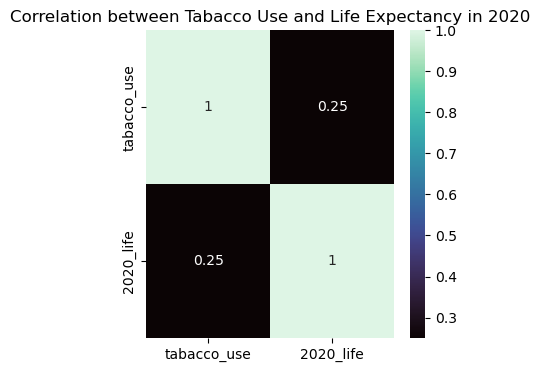

In [26]:
# Code
#heatmap with seaborn
plt.figure(figsize=(4, 4))
sns.heatmap(merged_df[['tabacco_use', '2020_life']].corr(), annot=True, cmap='mako')
plt.title("Correlation between Tabacco Use and Life Expectancy in 2020")
plt.show()

**This heatmap shows a weak correlation between tabacco use and life expectancy in 2020.** 

Inspiration on how to tell the strength of a correlation was used from: https://www.statology.org/what-is-a-weak-correlation/#:~:text=In%20summary%3A-,1.,compared%20to%20a%20technology%20field.

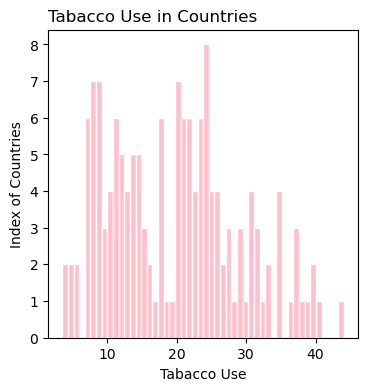

In [27]:
plt.figure(figsize=(4, 4))
plt.hist(merged_df['tabacco_use'], bins=50, color='pink', edgecolor='white')
plt.xlabel('Tabacco Use')
plt.ylabel('Index of Countries')
plt.title("Tabacco Use in Countries", loc='left')
plt.show()

**This graph of tabacco use in countries has a right-skewed distribution.**

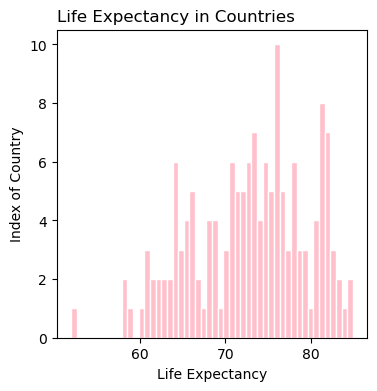

In [28]:
plt.figure(figsize=(4, 4))
plt.hist(merged_df['2020_life'], bins=50, color='pink', edgecolor='white')
plt.xlabel('Life Expectancy')
plt.ylabel('Index of Country')
plt.title("Life Expectancy in Countries", loc='left')
plt.show()

**This graph of life expectancy in countrieshas a left-skewed distribution.**

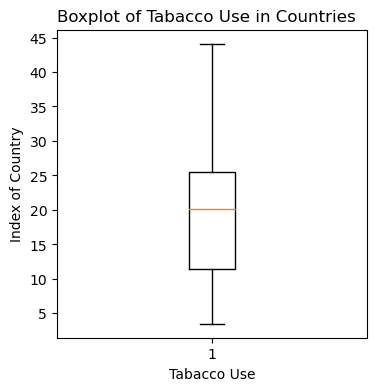

In [29]:
plt.figure(figsize=(4, 4))
plt.boxplot(merged_df['tabacco_use'])
plt.xlabel('Tabacco Use')
plt.ylabel('Index of Country')
plt.title('Boxplot of Tabacco Use in Countries', loc='left')
plt.show()

**This boxplot shows no outliers meaning that all the data for the tabacco use throughout various countries are relatively close together with no outstanding values.**

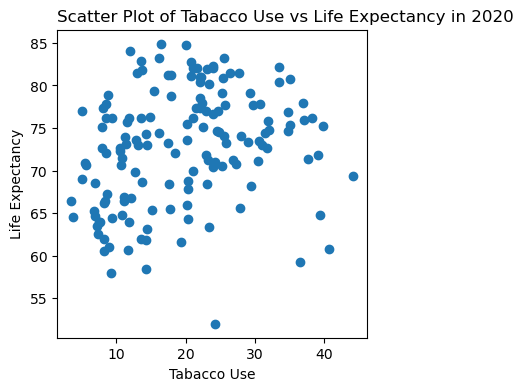

In [30]:
plt.figure(figsize=(4, 4))
plt.scatter(merged_df['tabacco_use'], merged_df['2020_life'])
plt.xlabel('Tabacco Use')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of Tabacco Use vs Life Expectancy in 2020', loc='left')
plt.show()

**The scatter plot does not show a relationship between tabacco use and life expectancy in 2020.**

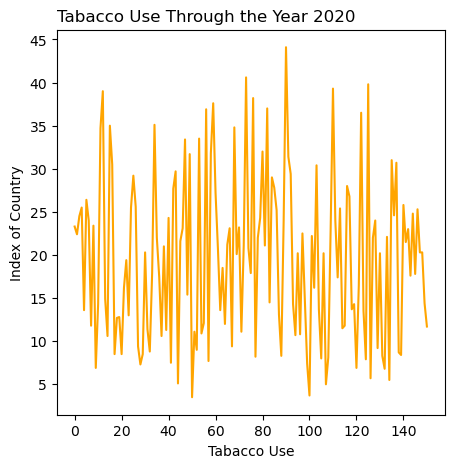

In [31]:
plt.figure(figsize=(5, 5))
plt.plot(merged_df['tabacco_use'], color='orange')
plt.xlabel('Tabacco Use')
plt.ylabel('Index of Country')
plt.title('Tabacco Use Through the Year 2020', loc='left')
plt.show()


**This graph shows that there is a very wide range of values for tabacco use throughout various countries.**

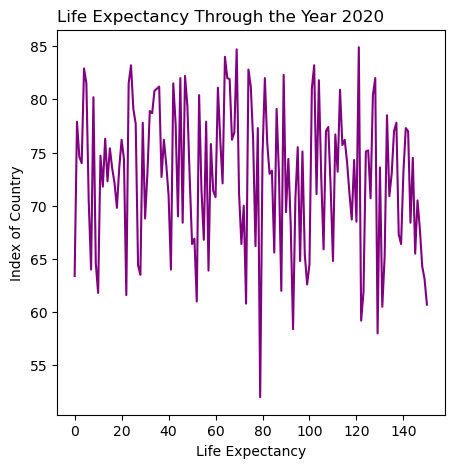

In [32]:
plt.figure(figsize=(5, 5))
plt.plot(merged_df['2020_life'], color='purple')
plt.xlabel('Life Expectancy')
plt.ylabel('Index of Country')
plt.title('Life Expectancy Through the Year 2020', loc='left')
plt.show()

**This graph shows that there is a very wide range of values for life expectancy throughout various countries.**

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

# Conclusions
- Based on the data shown above, there did not seem to be a relationship between life expectancy and tabacco usage in the year 2020
- The country with the highest tabacco use for 2020 was Myanmar
- The country with the lowest life expectancy for the year 2020 was not Myanmar, but Lesotho

# Recommendations
- Although the data does not show a relationship between tabacco use and a decrease in life expectancy, smoking is still harmful and can cause major health issues and it is advised to limit or completely stop smoking habits
- For future analysis, the project could be improved upon by adding in another dataset which includes the access to healthcare systems across the world as that plays a huge factor in overall life expectancy

### Side notes
- Data does not take into account how a variety of countries have less access to healthcare, medication, etc, which is a big factor in overall life expectancy
- Data for tabacco usage only considers adults while there could be underage individuals 